# Heart Disease Prediction

This notebook will use ML classification models with scikit-learn piplines to make prediction.

In [1]:
# Import necessary tools

# EDA and Plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from scikit Learn, we will try below 3 different models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation libraries
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, plot_roc_curve

## Load Data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


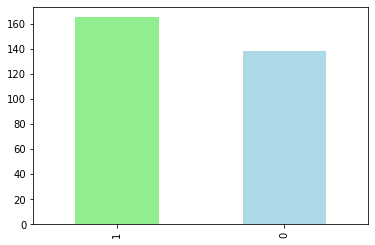

In [4]:
df.target.value_counts().plot(kind="bar", color=["lightgreen", "lightblue"]);

In [5]:
# Heart disease frequency as per sex
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Text(0.5, 0, 'Target')

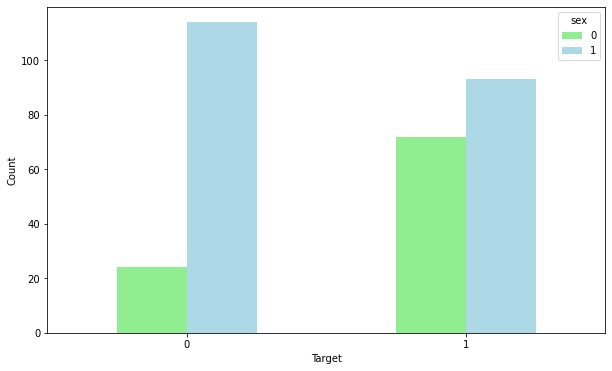

In [6]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["lightgreen", "lightblue"]);
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.xlabel("Target")

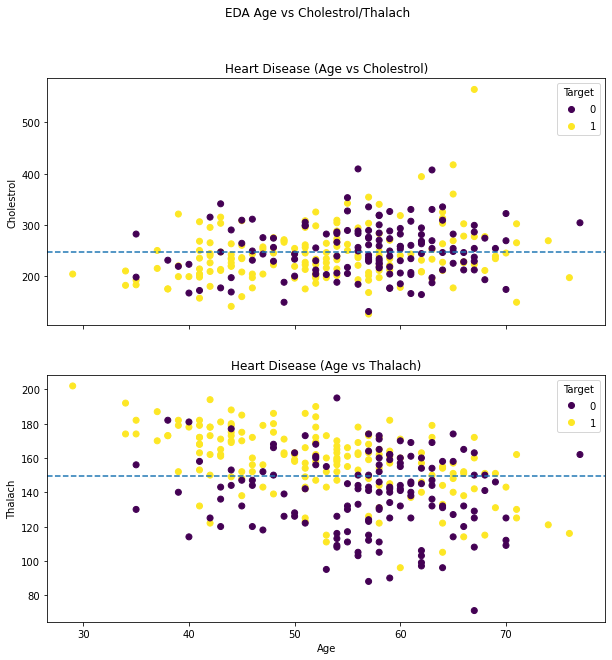

In [7]:
# Age vs Thalach(Max heart Rate)
figure, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True)

# Plot Age vs Cholestrol on ax0
scatter = ax0.scatter(x=df.age, y=df.chol, c=df.target)
ax0.set(title="Heart Disease (Age vs Cholestrol)", ylabel="Cholestrol")
ax0.legend(*scatter.legend_elements(), title="Target")
# ax0.legend(["Positive", "Negative"])

# Add a horizontal line for mean value of Cholestrol
ax0.axhline(df.chol.mean(), linestyle="--")

# Plot Age vs Thalach on ax1
scatter1 = ax1.scatter(x=df.age, y=df.thalach, c=df.target)
ax1.set(title="Heart Disease (Age vs Thalach)", ylabel="Thalach", xlabel="Age")
ax1.legend(*scatter1.legend_elements(), title="Target")
ax1.axhline(df.thalach.mean(), linestyle="--")

# Add a title to Figure
figure.suptitle("EDA Age vs Cholestrol/Thalach");

### Heart Disease frequency with respect to chest pain type

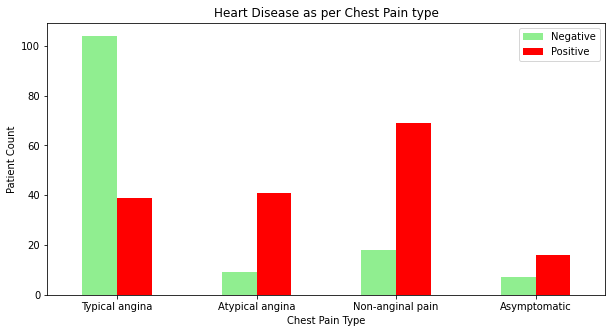

In [8]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 5), color=["lightgreen", "red"])
plt.title("Heart Disease as per Chest Pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Patient Count")
plt.xticks(ticks=(0,1,2,3), labels=("Typical angina", "Atypical angina", "Non-anginal pain","Asymptomatic"), rotation=0)
plt.legend(["Negative","Positive"]);

#### Chest Pain Type

* 0: Typical angina: chest pain related decrease blood supply to the heart.
* 1: Atypical angina: chest pain not related to heart.
* 2: Non-anginal pain: typically esophageal spasms (non heart related).
* 3: Asymptomatic: chest pain not showing signs of disease.


## Correlation between independent Variables

It gives and idea of which independent variable may or may not have an impact on our target variable.

A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

In [9]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


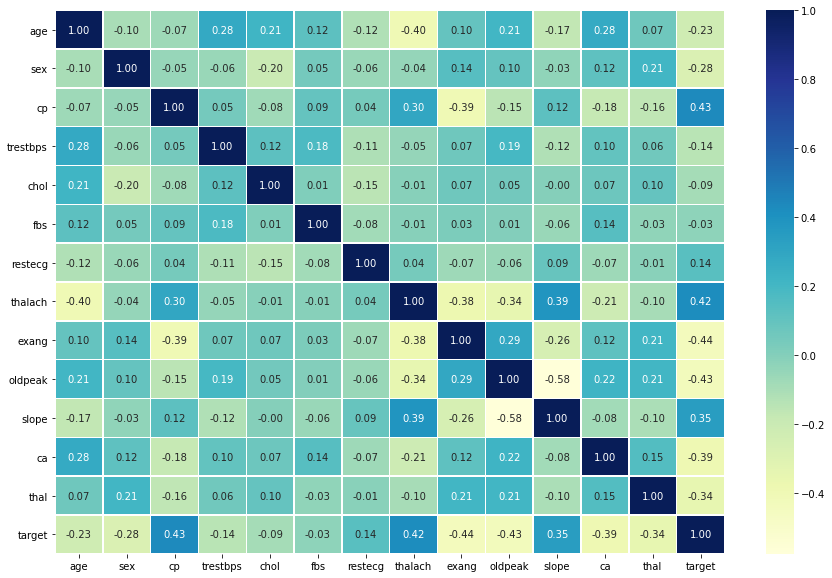

In [10]:
# Plor correlation matrix on a heat map for better visualization
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True,linewidths=0.5, fmt=".2f", cmap="YlGnBu");

# Modelling

Now we'll implement machine learning models to predict our target variable based on 13 independent variables.

If we can reach 95% accuracy at predicting whether or not they have a heart disease during the proof of concept, we'll pursue this project.


let's have a loot at our data again

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
# Split Data in X and Y
X = df.drop("target", axis=1)
Y = df.target

X.shape, Y.shape

((303, 13), (303,))

In [13]:
# Train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)
X_test.shape, Y_test.shape, X_train.shape, Y_train.shape

((61, 13), (61,), (242, 13), (242,))

In [14]:
Y_test.value_counts()

1    33
0    28
Name: target, dtype: int64

## Build Machine Learning Models and train it over data

**We Will try below 3 models to make our prediction**
* Logistic Regression
* K-Neighbours CLassification
* Random Forest Classifier

In [15]:
# Put models in Dictionary
models = {"KNN": KNeighborsClassifier(),
         "Logistic_Regression": LogisticRegression(),
         "Random Forest": RandomForestClassifier()}

# Create Function to Fit and Score above models.
def fit_score(models, X_train, X_test, Y_train, Y_test):
    """
    inputs:
    
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    Y_train : labels assosciated with training data
    Y_test : labels assosciated with test data
    
    return: model_scores - A dictionary with score of each model.
    """
    np.random.seed(42)
    # Make a dictionary to store scores of each model.
    model_scores= {}
    
    # Loop through models
    for name, model in models.items():
        model.fit(X_train, Y_train)
        model_scores[name] = model.score(X_test, Y_test)
        
    return model_scores

In [16]:
model_scores = fit_score(models, X_train, X_test, Y_train, Y_test)

model_scores

D:\Installations\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6557377049180327,
 'Logistic_Regression': 0.8360655737704918,
 'Random Forest': 0.819672131147541}

## Model Comparison

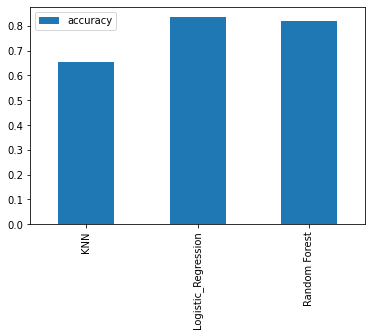

In [17]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

### From above graph it's clearthat Logistic Regression performs best on given dataset.

Next Steps:
1) Tune model hyperparameters, see which performs best (This we'll do over all three models for now, to see if results changes).

2) Perform cross-validation.

3) Plot ROC curves.

4) Make a confusion matrix.

5) Get precision, recall and F1-score metrics.

6) Find the most important model features.